In [6]:
import numpy as np
import pandas as pd
import os
import re
import string
import datetime
base = "../../data/clean/"
pd.set_option('display.max_rows', 150)

In [9]:
filename="trisma2016_cleaned_text_by_lga_and_time_of_day.csv"
tweetdf=pd.read_csv(os.path.join(base, filename),header=0, keep_default_na=False)
docs = tweetdf[['lga','time_of_day','cleaned']][tweetdf.cleaned != '']
docs.columns = ['LGA','time_of_day','cleaned']
docs

,LGA,time_of_day,cleaned
0,Albury,afternoon,can't say if its personally directed me but wh...
1,Albury,evening,new year resolution find another job so you do...
2,Albury,morning,going to be smashing season this year good luc...
3,Albury,night,#2015bestnine #bestofnine2015 #byebye #2015 #h...
4,Armidale Regional,afternoon,#tnfydh_lqss_ _47_rhby lysw mdhhb whd wl jnsy ...
5,Armidale Regional,evening,bit of rare site over there can't it's overcas...
6,Armidale Regional,morning,woohoo think there's also number of people exc...
7,Armidale Regional,night,tranquility in the park moore park inn boutiqu...
8,Ballina,afternoon,when my lil sister calls her close friends cou...
9,Ballina,evening,if you are feeling too positive about yourself...


In [26]:
docs['length'] = [len(doc) for doc in docs.cleaned.str.split(' ')]
docs

,LGA,time_of_day,cleaned,length
0,Albury,afternoon,can't say if its personally directed me but wh...,30299
1,Albury,evening,new year resolution find another job so you do...,51384
2,Albury,morning,going to be smashing season this year good luc...,88383
3,Albury,night,#2015bestnine #bestofnine2015 #byebye #2015 #h...,79134
4,Armidale Regional,afternoon,#tnfydh_lqss_ _47_rhby lysw mdhhb whd wl jnsy ...,9001
5,Armidale Regional,evening,bit of rare site over there can't it's overcas...,12568
6,Armidale Regional,morning,woohoo think there's also number of people exc...,28140
7,Armidale Regional,night,tranquility in the park moore park inn boutiqu...,22231
8,Ballina,afternoon,when my lil sister calls her close friends cou...,5014
9,Ballina,evening,if you are feeling too positive about yourself...,13943


In [32]:
target_df = pd.read_csv("../../data/clean/filtered_nonlog_target.csv").iloc[:,1:]
# Only keep docs for target LGAs:
docs = docs.merge(target_df[['LGA']], on='LGA')
docs

,LGA,time_of_day,cleaned,length
0,Albury,afternoon,can't say if its personally directed me but wh...,30299
1,Albury,evening,new year resolution find another job so you do...,51384
2,Albury,morning,going to be smashing season this year good luc...,88383
3,Albury,night,#2015bestnine #bestofnine2015 #byebye #2015 #h...,79134
4,Armidale Regional,afternoon,#tnfydh_lqss_ _47_rhby lysw mdhhb whd wl jnsy ...,9001
5,Armidale Regional,evening,bit of rare site over there can't it's overcas...,12568
6,Armidale Regional,morning,woohoo think there's also number of people exc...,28140
7,Armidale Regional,night,tranquility in the park moore park inn boutiqu...,22231
8,Ballina,afternoon,when my lil sister calls her close friends cou...,5014
9,Ballina,evening,if you are feeling too positive about yourself...,13943


In [33]:
nights = docs[docs.time_of_day=='night']
mornings = docs[docs.time_of_day=='morning'] 
afternoons = docs[docs.time_of_day=='afternoon'] 
evenings = docs[docs.time_of_day=='evening'] 

In [34]:
[sum(nights.length), sum(mornings.length), sum(afternoons.length), sum(evenings.length)]

[2738004, 3339085, 1065676, 1791901]

In [35]:
# Set up Vectorizer for use with pre-cleaned and tokenized data
from sklearn.feature_extraction.text import TfidfVectorizer
from timeit import default_timer as timer
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def smc_tokeniser(doc):
    #return doc.split(' ')
    return [ps.stem(w) for w in doc.split(' ')]

tfidf = TfidfVectorizer(
    analyzer='word', tokenizer=smc_tokeniser, ngram_range=(1,3),
    max_features=5000, stop_words='english', token_pattern=None)  

In [36]:
from collections import defaultdict
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

# X must be a dataframe whose last column is vector of text docs
# y must be a dataframe with one or more label columns, and last column of target.
# The first columns of y will be used as labels to return results.
def tfidf_cv(X, y, max_features=None, folds=5):
    assert len(X) == len(y)
    
    if not max_features:
        max_features = len(y)
    # Empty dataframe for predictions
    preds = pd.DataFrame(columns = y.columns)
    preds['predicted'] = 0
    importants = defaultdict(float)
    kf = KFold(n_splits=folds, shuffle=True)
    for train_index, test_index in kf.split(X):
        X_train_df, X_test_df = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train_df, y_test_df = y.iloc[train_index,:], y.iloc[test_index,:].copy()
        
        # Fit tfidf model for train:
        tfidf = TfidfVectorizer(analyzer='word',tokenizer=smc_tokeniser,ngram_range=(1,3),
                            max_features=max_features,stop_words='english',token_pattern=None)  
        X_train = tfidf.fit_transform(X_train_df.iloc[:,-1])
        X_test = tfidf.transform(X_test_df.iloc[:,-1])
        features = np.array(tfidf.get_feature_names())
        
        model = RandomForestRegressor(random_state=42)
        model.fit(X_train, y_train_df.iloc[:,-1])
        
        # Save important features
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        for f in range(len(indices)):
            importants[features[indices[f]]] += importances[indices[f]] / folds

        # Save predictions
        y_test_df['predicted'] = model.predict(X_test)
        preds = pd.concat([preds,y_test_df])
        
        print('Finished processing',len(preds),'records...')

    return preds, importants

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def tfidf_metrics(predictions, importants):
    print('MOST IMPORTANT FEATURES:')
    for w in sorted(importants, key=lambda x: np.abs(importants.get(x)), reverse=True)[0:20]:
      print(w, importants[w])

    y = predictions.iloc[:,-2]
    pred = predictions.iloc[:,-1]
    print('R2:',r2_score(y,pred))
    print('RMSE:',np.sqrt(mean_squared_error(y,pred)))
    print('MAPE:',mape(y,pred))
    print('Mean APE Baseline:',mape(y,np.mean(y)))

    fig, ax = plt.subplots()
    ax.scatter(y, pred, edgecolors=(0, 0, 0))
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.show()

Redo grid search on first target for optimal max features

In [38]:
docs = evenings[['LGA','cleaned']]

Finished processing 40 records...
Finished processing 80 records...
Finished processing 120 records...
Finished TF-IDF 3 fold cross validation in 108.53461256809533 seconds
MOST IMPORTANT FEATURES:
way 0.126106542698
nsw 0.125026254235
#nswfire 0.0429647040679
dec 2016 0.0413451722047
sydney 0.0332276645214
nov 2016 0.0322156386622
nov 0.0321397035452
anoth 0.0265247211545
advic bush 0.018856668297
best 0.0146620367586
beach 0.0146488424926
right 0.0140364063663
#nswfire advic 0.0134087517738
bush 0.0125863041643
make 0.0122707116014
young 0.0119056476522
#nswrf 0.0116359892866
got 0.011160955046
guy 0.011042306621
look 0.010769146191
R2: -0.124213091087
RMSE: 310.962051624
MAPE: 72.3494629987
Mean APE Baseline: 72.0914035637


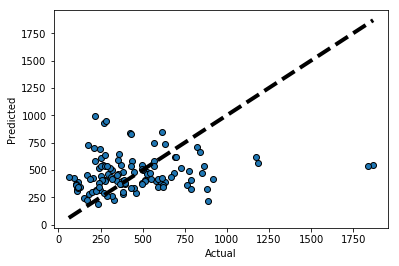

Finished processing 40 records...
Finished processing 80 records...
Finished processing 120 records...
Finished TF-IDF 3 fold cross validation in 108.20013948599808 seconds
MOST IMPORTANT FEATURES:
cool 0.0702223137292
#grassfir 0.0625309864086
nsw 0.0477754116597
grass 0.0475624261896
st 0.0289192595135
sydney 0.0277665139923
read 0.0270912430598
hwi 0.0256012510965
boy 0.0234658530217
#nswrf #bushfir #nswfire 0.0223244904161
power 0.0188998756475
servic 0.0187463148978
30 0.0184300601867
😭 0.0172443410555
won't 0.0161764287361
bush clarenc valley 0.0159826041775
club 0.0156095337468
doesn't 0.0153667281959
oct 2016 0.0149034094981
stay 0.013922116529
R2: 0.0939338284156
RMSE: 279.166326578
MAPE: 70.595966701
Mean APE Baseline: 72.0914035637


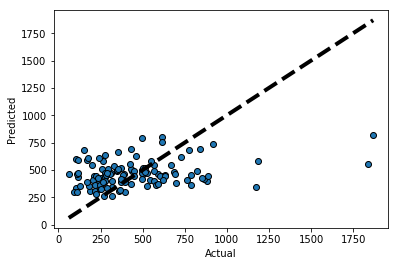

Finished processing 40 records...
Finished processing 80 records...
Finished processing 120 records...
Finished TF-IDF 3 fold cross validation in 109.77090757689439 seconds
MOST IMPORTANT FEATURES:
grass 0.0498548155171
#sydney 0.0448238061336
suicid 0.0434143740498
nsw 0.0294974845535
sunday 0.0248618378861
😊 😊 0.0236970477954
dec 2016 0.0218393778592
fantast 0.0215369636039
east 0.0205095666028
#nswrf #grassfir advic 0.0173824274778
advic 0.0169265137785
#grassfir 0.0163371826507
ground 0.015902185012
heat 0.0146627779759
staff 0.0145540560618
😭 0.0138798258285
just 0.0137109206194
56 0.0132005255493
can't wait 0.0130216442451
snapchat 0.0128433419372
R2: -0.0337175565562
RMSE: 298.183782852
MAPE: 70.9826885209
Mean APE Baseline: 72.0914035637


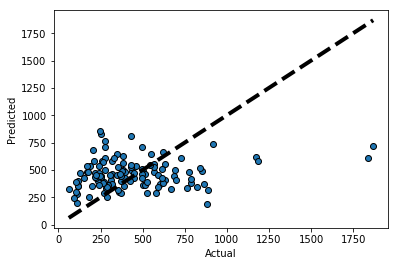

Finished processing 40 records...
Finished processing 80 records...
Finished processing 120 records...
Finished TF-IDF 3 fold cross validation in 112.32328091398813 seconds
MOST IMPORTANT FEATURES:
ag 0.0334697921697
sydney 0.0320795016469
#grassfir 0.0313328015558
😊 😊 0.0247813113865
#grassfir advic grass 0.0219238347176
shock 0.0215856790469
#sydney 0.0213783711856
#grassfir advic 0.0209399274118
appl 0.0208154914809
anoth day 0.0196166305709
round 0.0184334335796
😭 😭 😭 0.017618354686
staff 0.0170489734474
ground 0.0153620080064
servic 0.0149046164741
dawn 0.0146115820255
treat 0.0144062263284
just 0.0142744852542
#nswrf #grassfir 0.013219001616
nsw 0.0127705023969
R2: 0.0349137461702
RMSE: 288.115178737
MAPE: 70.1256770596
Mean APE Baseline: 72.0914035637


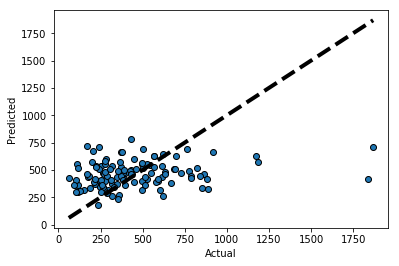

In [41]:
for f in [200,500,2000,5000]:
    start = timer()
    predictions, importants = tfidf_cv(docs, target_df[['LGA','Assault - domestic violence']], max_features=f, folds=3)
    end = timer()
    print('Finished TF-IDF 3 fold cross validation in',end-start,'seconds')
    tfidf_metrics(predictions, importants)

Not very good but the idea here is it may vary between crimes. Stick with 5000:

TFIDF RFR BY LGA FOR EVENING TWEETS ONLY. MAX FEATURES 5000.
Assault - domestic violence
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 191.70534694194794 seconds
MOST IMPORTANT FEATURES:
cool 0.053270291378
92 0.0524888765149
#sydney 0.0426847940255
danc 0.0425056926735
grass 0.0382878855964
harvest 0.0324007263956
nsw 0.0301820901788
#grassfir 0.0210519801414
29 0.0161745714825
st 0.0147012184152
slap 0.0144139788188
let' 0.0141185711482
broken hill 0.0132044288703
independ 0.0125994875662
woke 0.0117996769441
hwi 0.0115462002841
eye 0.0110287401323
shot 0.01087150591
averag 0.0108442041677
box 0.0102137669179
R2: 0.0946631023237
RMSE: 279.053956363
MAPE: 67.2848627695
Mean APE Baseline: 72.0914035637


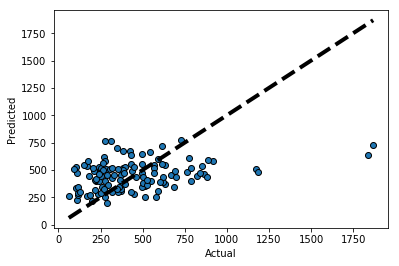

Assault - non-domestic violence
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 192.83271961589344 seconds
MOST IMPORTANT FEATURES:
cool 0.0846544626346
fantast 0.0549058824658
sydney 0.023316596281
#grassfir 0.0213284074069
harvest 0.019565451336
nsw 0.0192288523145
2016 0.0188359340911
#nswrf 0.0187808215307
st 0.0165735674465
appl 0.0159529747138
broken hill 0.0137504368072
en 0.0131916290405
flight 0.0128593273496
centuri 21 0.0127397768187
plant 0.0103527441847
29 dec 2016 0.010345445248
adam 0.0103394849884
21 0.0101616896777
murder 0.0100856728946
thing 0.00984806141693
R2: 0.0279862601916
RMSE: 239.679405905
MAPE: 53.6659784753
Mean APE Baseline: 59.8326771602


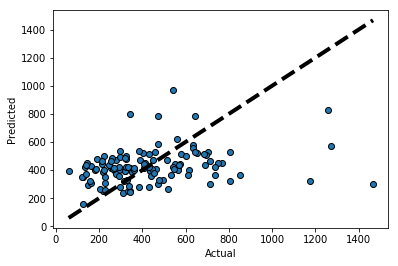

Fraud
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 191.09124624705873 seconds
MOST IMPORTANT FEATURES:
good morn 0.0432741768848
sydney 0.0431814894641
en 0.0373888852643
bu 0.0240184814452
nsw 0.0221358573159
mi 0.0213499308277
bir 0.0189707689335
cbd 0.0183496395747
deliveri 0.0171339441931
thi wa 0.0155692051768
ama 0.0154665631373
da 0.0153058335851
cok 0.015303437024
2016 0.0152707433758
frank 0.0147584086674
believ 0.0147513036317
today' 0.0143035327008
ve 0.0131972237289
biz 0.0129664668821
phone 0.0128099507749
R2: 0.0819598165337
RMSE: 277.099215622
MAPE: 44.8566285366
Mean APE Baseline: 50.564378615


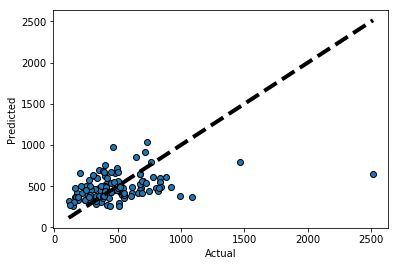

Sexual Offences
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 193.6226451860275 seconds
MOST IMPORTANT FEATURES:
sydney 0.0759170863377
#sydney 0.0452678241216
dec 2016 0.0329570398231
turn 0.0203494009028
second 0.0201286351021
mother 0.0178288416859
13 0.0170643274384
#grassfir #nswfire advic 0.0169442151971
#grassfir #nswfire 0.0155113036551
#roadtrip 0.0141559805561
#bushfir 0.01375254793
celebr 0.0127002728876
appl 0.0119135224907
today 0.011272505646
wale 0.0108032846826
bush 0.0101585856042
12.5 0.0094562477966
24 dec 2016 0.0090758784962
#grassfir advic 0.00900522386104
#dog 0.0085924596838
R2: 0.0209403285112
RMSE: 92.3686643965
MAPE: 47.141350895
Mean APE Baseline: 53.0821806583


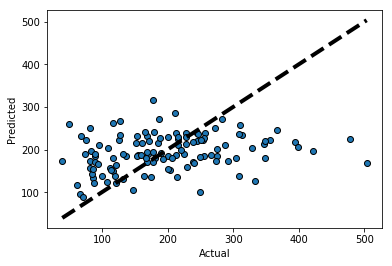

Malicious damage to property
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 193.5415385637898 seconds
MOST IMPORTANT FEATURES:
cool 0.0698832020061
#grassfir 0.0492467034539
#nswrf #grassfir advic 0.0347496085772
#sydney 0.0311161657035
advic 0.0262645292003
appl 0.0224604616234
dec 2016 0.0197164938742
nsw 0.0187179899731
staff 0.0182522622454
st 0.0174796561208
#nswrf #grassfir 0.0156123408354
spot 0.0134763322108
#nswrf advic bush 0.0130148520469
can't wait 0.0124482220318
you'll 0.0123938562393
field 0.0123038091934
independ 0.0119183398665
differ 0.011581751099
#grassfir #nswfire 0.0112499368101
way 0.0111132501281
R2: -0.165831700278
RMSE: 618.545923406
MAPE: 55.5103772408
Mean APE Baseline: 53.4238936165


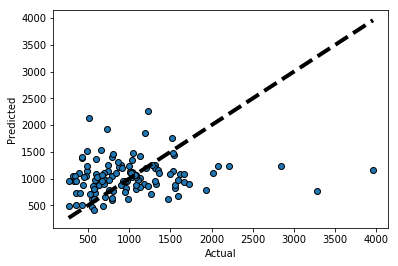

Prohibited weapons offences
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 193.6702817629557 seconds
MOST IMPORTANT FEATURES:
#sydney 0.065658498962
appl 0.0315404190241
nsw 0.0267156044307
time 0.0212293124159
sydney 0.0203725667325
leader 0.0185383435288
i'v 0.0184012655043
barrier 0.0170855967891
train 0.0167759765618
farmer 0.0162456855787
#nswrf 0.0159139557275
tri 0.0158686604612
dec 2016 0.0155203618153
everi 0.015013739674
awesom 0.0138312388478
hwi 0.0135205442185
turn 0.0130387350507
st 0.0125210297589
record 0.0111409602389
mate 0.010965280362
R2: 0.148872107799
RMSE: 137.613536198
MAPE: 94.4598025346
Mean APE Baseline: 126.659859832


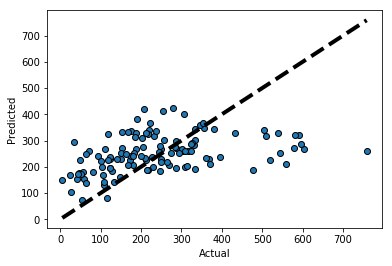

In [46]:
tfidf_output = pd.DataFrame()
print('TFIDF RFR BY LGA FOR EVENING TWEETS ONLY. MAX FEATURES 5000.')
for target in target_df.columns[1:]:
    print(target)
    start = timer()
    preds, importants = tfidf_cv(docs, target_df[['LGA',target]], max_features=5000, folds=5)
    end = timer()
    print('Finished TF-IDF 5 fold cross validation in',end-start,'seconds')
    tfidf_metrics(preds, importants)
    if len(tfidf_output.columns) == 0:
        tfidf_output['LGA'] = preds['LGA']
    tfidf_output['TF-IDF '+target] = preds[preds.columns[-1]]

In [45]:
tfidf_output.to_csv("../../data/clean/tfidf_by_lga_and_evenings_2016_rfr_preds.csv",index=False)

Desn't work very well, if at all, but possibly important features give soem insight. Its fast so might as well try night as well:

TFIDF RFR BY LGA FOR NIGHT TWEETS ONLY. MAX FEATURES 5000.
Assault - domestic violence
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 292.81495718099177 seconds
MOST IMPORTANT FEATURES:
rail 0.0727455826841
bath 0.0501643252562
gwydir 0.0476373911703
row 0.0449062394369
just post photo 0.0287924946267
#grassfir #nswfire grass 0.0269406559539
just 0.0234189753221
nsw just 0.0203487213878
weather 0.0178025676867
hwi 0.0167964480835
sydney 0.015372798412
nsw 0.0151329128094
#nswrf #structurefir 0.0150839791818
14 dec 0.0144959216644
26 0.0144480262311
broken hill 0.0140456201207
#structurefir 0.0122982789241
13 dec 2016 0.0115596064266
#nswfire bush 0.0102579884872
post photo 0.00983272068988
R2: -0.276781490245
RMSE: 331.391498502
MAPE: 78.8092093078
Mean APE Baseline: 72.0914035637


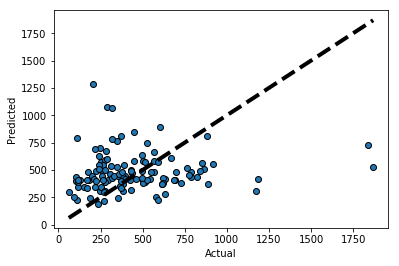

Assault - non-domestic violence
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 299.37917783483863 seconds
MOST IMPORTANT FEATURES:
sydney 0.107378778294
29 dec 2016 0.0309711902213
frank 0.0260748717333
bath 0.0171380253564
64 0.0163801379316
narrabri 0.0158484356839
😍 😘 😘 0.0137845108163
rail 0.0122262662585
#sydney 0.011494395309
hwi 0.0112752598357
ben 0.0104633083477
lamb 0.009283066225
#grassfir #nswfire grass 0.00894428210136
#bbtid #broncosst 0.00885044336576
hunt 0.00881616839051
king 0.0087214807403
14 dec 0.0086857838091
land 0.00804263109455
#18thman #qlder #origin 0.00801820343348
#bushfir #nswfire bush 0.00784474226032
R2: -0.138547091526
RMSE: 259.400026842
MAPE: 59.8964207915
Mean APE Baseline: 59.8326771602


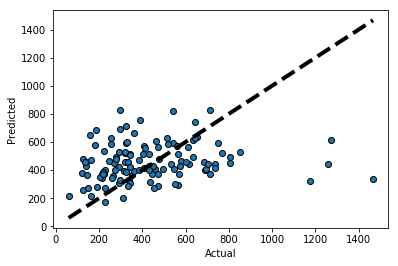

Fraud
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 295.1347565439064 seconds
MOST IMPORTANT FEATURES:
abi 0.0438688407371
email 0.0359363111334
ben 0.0344968095837
os 0.0257238246241
io 0.0238426242768
bu 0.0232904819221
paper 0.0196414432387
#bronxnat 0.0165037318152
perfectli 0.0153150462892
#decadeofdomin #marooncrusad #18thman 0.0149832637662
app 0.0146622429967
flight 0.0135292068423
frank 0.0133583971653
robert 0.0131870600916
panel 0.0130560183509
free 0.0126614273321
#sydney 0.0116706762724
si 0.0114243722262
tool 0.0113173333905
instagram 0.0110622963239
R2: -0.048263113566
RMSE: 296.100815107
MAPE: 50.0357009599
Mean APE Baseline: 50.564378615


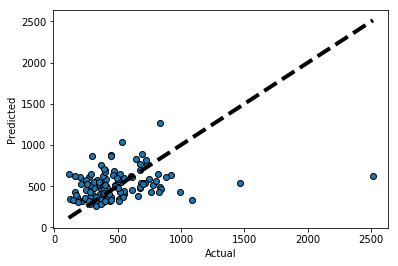

Sexual Offences
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 295.3280507689342 seconds
MOST IMPORTANT FEATURES:
#sydney 0.187645311883
sydney 0.0257770195575
bean 0.0227573027641
child 0.0200599325878
#indigen 0.0155614361925
#australia 0.0136163377927
edward 0.0135502644249
day 0.0132317721531
start 0.010265447039
board 0.00826410989549
30 oct 2016 0.00826374728961
nov 2016 0.00804316472989
😂 😂 0.0072503742624
grow 0.00720191069621
know 0.00708214281164
end 0.00693425467006
engin 0.00664722092497
big 0.00657129599776
1.4 0.00646862688178
team 0.00644843179356
R2: 0.161046317998
RMSE: 85.5045203832
MAPE: 38.8760810248
Mean APE Baseline: 53.0821806583


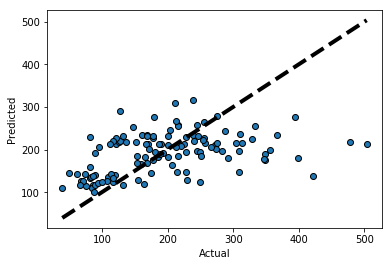

Malicious damage to property
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 291.0831269409973 seconds
MOST IMPORTANT FEATURES:
rail 0.0745163375194
#grassfir #nswfire grass 0.0554398535384
#sydney 0.0518292820228
narrabri 0.0476166022903
sydney 0.0473322237567
#nswfire 0.016658512029
#nswfire grass 0.0165137512687
nov 2016 0.0156925020669
hwi 0.015601208488
merino 0.0152627683804
just 0.0132613839359
10 oct 0.0130165018025
row 0.0126040821468
mitch 0.0123159205327
assess 0.0103516694545
street 0.0100251377155
easili 0.00974770553047
plain 0.00962099734771
post 0.00940228009175
30 dec 2016 0.00920683930429
R2: -0.338679950923
RMSE: 662.815107168
MAPE: 58.5165592849
Mean APE Baseline: 53.4238936165


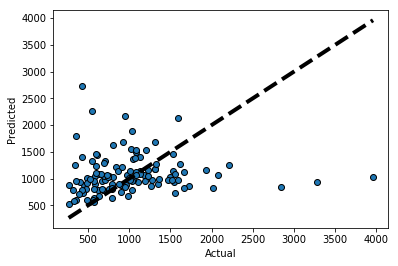

Prohibited weapons offences
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 295.36591325188056 seconds
MOST IMPORTANT FEATURES:
#sydney 0.215508995965
hwi 0.0477245638866
befor 0.0323977651758
sydney 0.026915127989
thi morn 0.0259417719855
25 0.0252767725565
dri 0.0154361421388
structur 0.0148230927936
birthday 0.0123740468522
legend 0.0116154605727
come 0.0114244295333
#grassfir #nswfire 0.0111619985314
❤ 0.0111235795236
onli 0.00989162555068
nearli 0.00840352130407
14 dec 2016 0.00816297968536
#nswfire 0.00784341998097
twitter 0.00752795279494
just 0.00749956125164
make 0.00719880487737
R2: 0.155499164357
RMSE: 137.076745639
MAPE: 79.706760282
Mean APE Baseline: 126.659859832


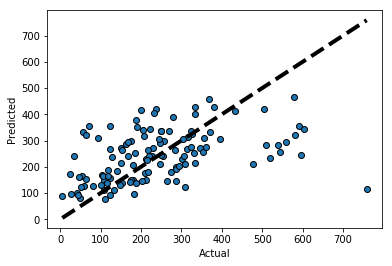

In [47]:
docs = nights[['LGA','cleaned']]
tfidf_output = pd.DataFrame()
print('TFIDF RFR BY LGA FOR NIGHT TWEETS ONLY. MAX FEATURES 5000.')
for target in target_df.columns[1:]:
    print(target)
    start = timer()
    preds, importants = tfidf_cv(docs, target_df[['LGA',target]], max_features=5000, folds=5)
    end = timer()
    print('Finished TF-IDF 5 fold cross validation in',end-start,'seconds')
    tfidf_metrics(preds, importants)
    if len(tfidf_output.columns) == 0:
        tfidf_output['LGA'] = preds['LGA']
    tfidf_output['TF-IDF '+target] = preds[preds.columns[-1]]

In [48]:
tfidf_output.to_csv("../../data/clean/tfidf_by_lga_and_nights_2016_rfr_preds.csv",index=False)

Night tweets dont work for some criems but possibly for others. What about mornings?

TFIDF RFR BY LGA FOR MORNING TWEETS ONLY. MAX FEATURES 5000.
Assault - domestic violence
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 356.2404160699807 seconds
MOST IMPORTANT FEATURES:
#grassfir 0.0425618926056
egg 0.0405810176958
st 0.0316721723653
encourag 0.0240311055881
outback 0.0233268148036
#grassfir #nswfire 0.0211725057606
ha gone 0.0211685522985
#nswfire grass 0.0205593406192
beat 0.0192419472063
half hour 0.0182192440368
score 0.0178527352421
24 0.0138823049047
metal 0.0132700728966
#nswfire 0.012429558452
28 dec 2016 0.0120884873778
station 0.0116437811694
think it' 0.0115016559973
degre 0.0113816544778
boot 0.0111527085533
coonambl 0.0110819872252
R2: -0.0472675071696
RMSE: 300.131714028
MAPE: 76.7318601085
Mean APE Baseline: 72.0914035637


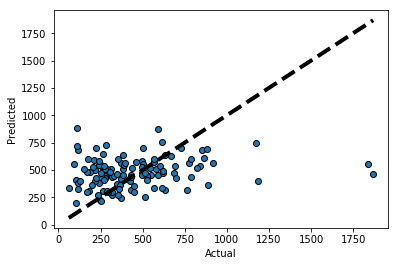

Assault - non-domestic violence
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 354.81403736700304 seconds
MOST IMPORTANT FEATURES:
mi 0.0314888830106
hunt 0.0270124853468
egg 0.026168755652
mighti 0.0254958727259
cameron 0.0248810665008
st 0.0240882459034
#nswfire advic grass 0.0181327805861
lamb 0.0159030320849
nat 0.0135992270581
direct 0.0120380298315
jean 0.0117981663978
point 0.0115462958828
km 0.0113556582447
rain 0.0111851787534
bout 0.0111771367301
#grassfir #nswfire 0.0111657569069
26 nov 0.0107599536066
gin 0.0106322476428
14 0.0105645081
ghost 0.0103543359328
R2: 0.0396234284935
RMSE: 238.240337699
MAPE: 56.8251760856
Mean APE Baseline: 59.8326771602


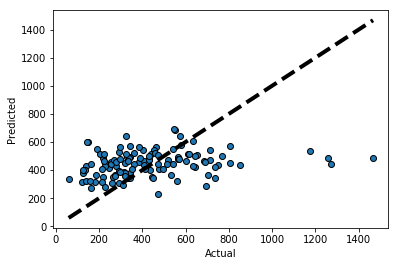

Fraud
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 358.5317778058816 seconds
MOST IMPORTANT FEATURES:
ama 0.0512481262822
var 0.0400367502148
orospu 0.0235313897802
io 0.0210575503394
bu 0.0203134796115
#sydney 0.0191199921166
ben 0.0190746195939
sen 0.0190683749565
podcast 0.016717598505
food 0.0166398731311
mi 0.0150673137256
ve 0.0148323717841
yi 0.0143613200203
frank 0.0143529246255
assum 0.0142377029328
#bbtid 0.0134884360884
en 0.0127700046059
abi 0.0125666843491
cok 0.012440548889
connect 0.0123411441028
R2: 0.203382479127
RMSE: 258.124589264
MAPE: 40.8852493527
Mean APE Baseline: 50.564378615


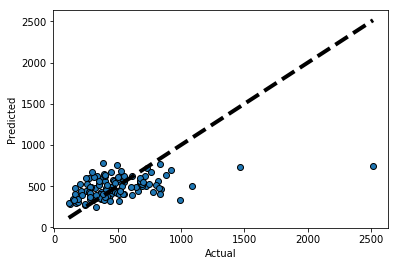

Sexual Offences
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 360.5195531069767 seconds
MOST IMPORTANT FEATURES:
#grassfir 0.039649278405
#nswfire 0.0380629186778
#sydney 0.0378245401483
#photo 0.0329937407621
nov 2016 0.0316593722692
bu 0.0220050767464
anyon know 0.016075228057
st 0.0160493022385
alcohol 0.0160140779092
grass 0.0156657092626
sydney 0.0121696517674
#nswfire advic grass 0.0115797964247
1.8 0.0110792322219
km 0.0109807806884
oct 2016 0.0102842548063
central 0.0101333875276
#bushfir 0.00994220974922
12 0.00880096160896
institut 0.00878793083257
heat 0.00846664250915
R2: 0.0140130376046
RMSE: 92.6948634939
MAPE: 47.3094803804
Mean APE Baseline: 53.0821806583


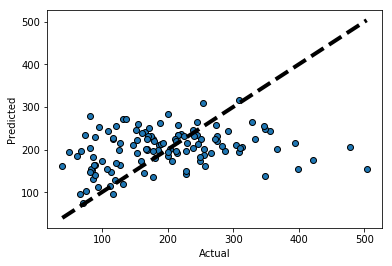

Malicious damage to property
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 352.7527476090472 seconds
MOST IMPORTANT FEATURES:
#grassfir #nswfire 0.0654977624933
#nswfire grass 0.056187328626
#grassfir 0.0396175583017
beat 0.0337209205916
lamb 0.0241447433298
egg 0.0237289095156
dream 0.0234961463071
st 0.0221718840057
bout 0.0180664474153
#grassfir #nswfire advic 0.0146263033601
bird 0.0145659764864
row 0.0133426276481
ha gone 0.0131570292053
clown 0.0120366924574
bloodi 0.01200067679
cheeki 0.0116239891916
ago 0.0113276604786
fruit 0.0107561804193
#sydney 0.0100394108467
mighti 0.00997124473258
R2: 0.188256923423
RMSE: 516.135006176
MAPE: 44.5709884822
Mean APE Baseline: 53.4238936165


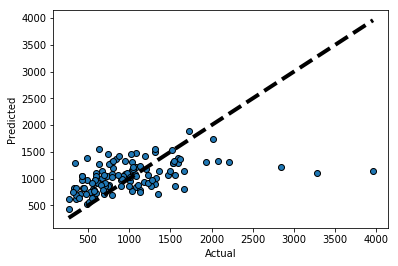

Prohibited weapons offences
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 351.7622167279478 seconds
MOST IMPORTANT FEATURES:
st 0.0926466694968
#grassfir 0.0591494272709
#sydney 0.04929127701
#grassfir #nswfire 0.0288395620357
sydney 0.0233336619364
#nswrf #grassfir 0.0196508679719
24 0.0188668877155
wet 0.0185006056817
dec 2016 0.0157272481019
produc 0.0153436751677
treatment 0.0150522613
dinner 0.0142204286648
bu 0.0123970718294
nat 0.0121925787313
advic grass 0.0116639609716
#nswfire 0.0113126499438
heat 0.0104444387653
bin 0.0098269078167
2016 0.00974060486748
park 0.00972840643858
R2: 0.203505776141
RMSE: 133.123601595
MAPE: 103.220480643
Mean APE Baseline: 126.659859832


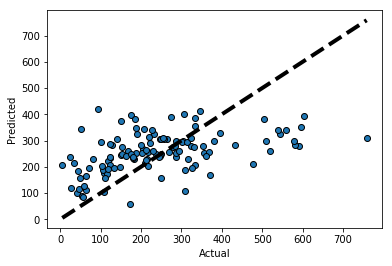

In [49]:
docs = mornings[['LGA','cleaned']]
tfidf_output = pd.DataFrame()
print('TFIDF RFR BY LGA FOR MORNING TWEETS ONLY. MAX FEATURES 5000.')
for target in target_df.columns[1:]:
    print(target)
    start = timer()
    preds, importants = tfidf_cv(docs, target_df[['LGA',target]], max_features=5000, folds=5)
    end = timer()
    print('Finished TF-IDF 5 fold cross validation in',end-start,'seconds')
    tfidf_metrics(preds, importants)
    if len(tfidf_output.columns) == 0:
        tfidf_output['LGA'] = preds['LGA']
    tfidf_output['TF-IDF '+target] = preds[preds.columns[-1]]

In [50]:
tfidf_output.to_csv("../../data/clean/tfidf_by_lga_and_mornings_2016_rfr_preds.csv",index=False)

TFIDF RFR BY LGA FOR AFTERNOON TWEETS ONLY. MAX FEATURES 5000.
Assault - domestic violence
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 110.50054262485355 seconds
MOST IMPORTANT FEATURES:
#nswrf #grassfir advic 0.0489338116421
nov 2016 0.0361500565132
grass 0.0298097348812
applic 0.025967440289
england 0.0252272672561
#grassfir advic 0.0242187432794
yr 0.0224859473907
10 0.0221654669271
dec 2016 0.0220167457237
#grassfir advic grass 0.0218284332596
#grassfir 0.0206887625466
tri 0.0203602089037
ridg 0.0197073943099
storm 0.0159821897834
#nswfire 0.0156434256504
11 0.0139523874614
rural 0.0118544020101
yu 0.0116631830203
🎂 0.0111512996297
extrem 0.0109563593329
R2: -0.098080672412
RMSE: 307.326632756
MAPE: 69.3071506229
Mean APE Baseline: 72.0914035637


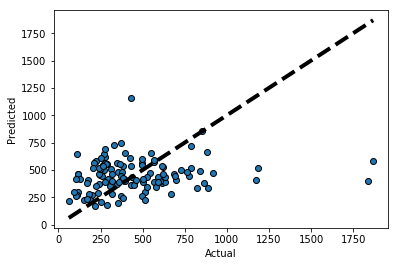

Assault - non-domestic violence
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 110.95656724693254 seconds
MOST IMPORTANT FEATURES:
st 0.039342596545
#nswrf #grassfir advic 0.0300665196852
junior 0.029575664741
#grassfir advic grass 0.024037672113
dec 2016 0.023684855271
kangaroo 0.0223443919019
14 0.0218279959356
nsw 0.0208637426038
longer 0.0189181847413
#grassfir advic 0.0182108188379
boyd 0.0136398706352
solid 0.0129853318579
extrem 0.0129605002784
10 nov 0.0128424971536
ridg 0.0121200808014
#structurefir #nswfire 0.0116217387859
#nswfire advic 0.0116178434508
anthoni 0.0109652311527
rest 0.0108375173686
rain 0.00957326209079
R2: -0.0432530275426
RMSE: 248.307218156
MAPE: 61.2355629724
Mean APE Baseline: 59.8326771602


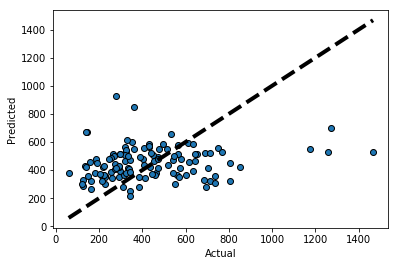

Fraud
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 111.11902295099571 seconds
MOST IMPORTANT FEATURES:
adam 0.137228562037
tonight 0.0446540077755
al 0.0289484646378
updat 0.0285815733561
annoy 0.0259403362278
abi 0.0247634326325
corey parker 0.0239665423656
#marooncrusad 0.0147509416063
movi 0.0147008425767
#decadeofdomin 0.014464494907
sam 0.0143883899678
#18thman #qlder 0.0132332211057
#bronxnat 0.0132263647165
bank 0.0128033365707
20 0.0121963624854
happi 0.0118640000696
jame 0.0113858173185
#broncosst #thankscozza 0.0111657399981
josh 0.0107775383307
#sydney 0.00936824330067
R2: 0.0720860259031
RMSE: 278.585371845
MAPE: 42.1764849986
Mean APE Baseline: 50.564378615


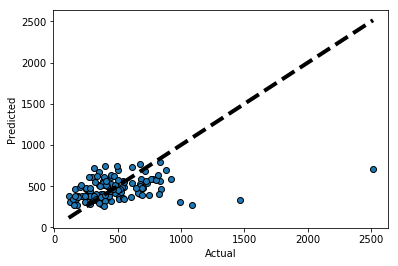

Sexual Offences
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 110.55212284019217 seconds
MOST IMPORTANT FEATURES:
st 0.0508933268414
dec 2016 0.0504067206345
nsw 0.0357638007178
#nswfire 0.025719581662
44 0.0248992255224
#nswrf 0.0198709449001
awesom 0.0188253578346
thi 0.0186349308287
hilari 0.017171677813
wa 0.0162829606844
#grassfir 0.016068710028
winner 0.014787653811
great 0.0145381932253
went 0.0142392514503
nov 2016 0.012900200699
farm 0.0115738358667
secret 0.0111396111867
rest 0.0102301229749
countri 0.00929317610275
don't think 0.00830147309202
R2: 0.0328239967502
RMSE: 91.8063749742
MAPE: 46.346118749
Mean APE Baseline: 53.0821806583


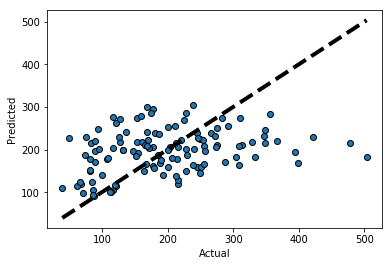

Malicious damage to property
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 110.68247710494325 seconds
MOST IMPORTANT FEATURES:
nsw 0.0519374619258
applic 0.0442474914393
#grassfir advic grass 0.037203437356
#grassfir 0.0283370477981
yr 0.0263327138134
univers 0.0214010131187
extrem 0.0211595101172
#nswrf #grassfir 0.0207882673382
travel 0.0182305286383
29 0.0170481399376
centr 0.0147431006299
💋 0.0143127527213
#grassfir advic 0.0133716641989
birthday 0.0121440289572
2016 0.0120219277022
oct 2016 0.0119201359091
love thi 0.01179084969
woman 0.0112691678901
rural 0.0101261959019
ate 0.00958302136488
R2: 0.00397290735742
RMSE: 571.728174773
MAPE: 53.1645791354
Mean APE Baseline: 53.4238936165


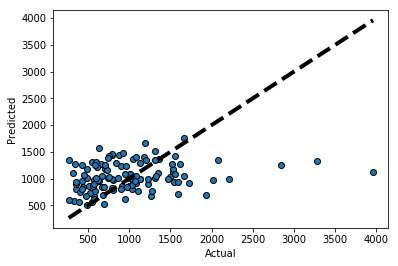

Prohibited weapons offences
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 111.09908953704871 seconds
MOST IMPORTANT FEATURES:
nsw 0.120716173003
st 0.0379147268226
dec 2016 0.0330621512142
grass 0.0277031285967
2016 0.0244700349209
rd 0.0240932612234
societi 0.0201441285013
spent 0.0186550712953
#sydney 0.0176066903861
#grassfir 0.0172514235169
#nswrf 0.01668446044
just 0.0156009953123
way 0.0133207532188
current 0.012710471324
rain 0.0123089001784
i'm 0.0122785039042
dec 0.010807831537
assist 0.0105979513659
20 0.010137575843
structur 0.00888950056965
R2: 0.146914614794
RMSE: 137.771692705
MAPE: 81.5205161207
Mean APE Baseline: 126.659859832


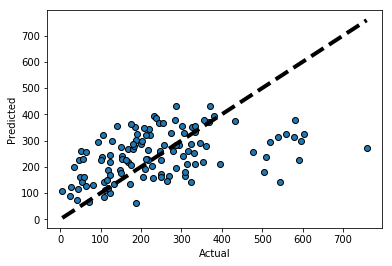

In [51]:
docs = afternoons[['LGA','cleaned']]
tfidf_output = pd.DataFrame()
print('TFIDF RFR BY LGA FOR AFTERNOON TWEETS ONLY. MAX FEATURES 5000.')
for target in target_df.columns[1:]:
    print(target)
    start = timer()
    preds, importants = tfidf_cv(docs, target_df[['LGA',target]], max_features=5000, folds=5)
    end = timer()
    print('Finished TF-IDF 5 fold cross validation in',end-start,'seconds')
    tfidf_metrics(preds, importants)
    if len(tfidf_output.columns) == 0:
        tfidf_output['LGA'] = preds['LGA']
    tfidf_output['TF-IDF '+target] = preds[preds.columns[-1]]

In [52]:
tfidf_output.to_csv("../../data/clean/tfidf_by_lga_and_afternoons_2016_rfr_preds.csv",index=False)